In [1]:
from epsilon_transformers.processes import RRXOR
from epsilon_transformers.visualization import visualize_graph
from epsilon_transformers.simple_transformer import train_hooked_model, sweep_train


# Instantiate the RRXORProcess
process = RRXOR()

In [2]:
print(f"the stationary distribution is {process.steady_state}")
print(f"The number of states is {process.num_states}")
print(f"The number of symbols is {process.num_symbols}")
print(f"The state names are {process.state_names.keys()}")
print(f"The transitions are \n{process.transition_matrix}")


the stationary distribution is [0.33333333 0.16666667 0.16666667 0.16666667 0.16666667]
The number of states is 5
The number of symbols is 2
The state names are dict_keys(['S', '0', '1', 'T', 'F'])
The transitions are 
[[[0.  0.5 0.  0.  0. ]
  [0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.5 0. ]
  [0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]]

 [[0.  0.  0.5 0.  0. ]
  [0.  0.  0.  0.5 0. ]
  [0.  0.  0.  0.  0.5]
  [1.  0.  0.  0.  0. ]
  [0.  0.  0.  0.  0. ]]]


In [3]:
# %%
from transformer_lens import HookedTransformer, HookedTransformerConfig
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
config = HookedTransformerConfig(
    d_model=16,
    d_head=4,
    n_layers=2,
    n_ctx=10,
    n_heads=4,
    d_mlp=4*16,
    d_vocab=2,
    act_fn='relu',
    use_attn_scale=True,
    normalization_type=None,
    attention_dir='causal',
    attn_only=False,
    seed=42,
    init_weights=True,
    device=device,
)

model = HookedTransformer(config)
# Define a config for the transformer and training
train_config = {
    # training config
    'batch_size': 64,
    'sequence_length': 500,
    'num_sequences': 100,
    'num_epochs': 200,
    'learning_rate': 1.5e-4,
    'weight_decay': 0,
}


cpu


In [7]:
import numpy as np
sweep_config = {
    'method': 'grid',  # Use 'grid' for grid search
    'metric': {
      'name': 'test_last_bit_loss',  # Replace with your validation metric
      'goal': 'minimize'      # Can be 'maximize' or 'minimize'
    },
    'parameters': {
        'learning_rate': {
            'values': np.logspace(-4, -2, num=10).tolist()  # Specify the grid values for learning rate
        },
        'weight_decay': {
            'values': [0]  # Specify the grid values for weight decay
        }
    }
}
sweep_id = wandb.sweep(sweep_config, project="epsilon-transformer")

# Use a lambda function or a partial function to pass additional arguments to sweep_train
wandb.agent(sweep_id, lambda: sweep_train(process, config, train_config))



Create sweep with ID: eaedbzxy
Sweep URL: https://wandb.ai/adamimos/epsilon-transformer/sweeps/eaedbzxy


wandb: Agent Starting Run: n0bgbboy with config:
wandb: 	learning_rate: 0.0001
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    52.52%    |    0.6905     |      56.09%       |      53.86%      |
|   2   |    55.59%    |    0.6546     |      60.08%       |      57.52%      |
|   3   |    60.00%    |    0.6561     |      61.57%       |      61.31%      |
|   4   |    63.21%    |    0.6194     |      62.35%       |      64.10%      |
|   5   |    64.94%    |    0.6387     |      63.13%       |      65.27%      |
|   6   |    65.57%    |    0.6687     |      63.19%       |      65.53%      |
|   7   |    65.91%    |    0.6098     |      63.48%       |      65.17%      |
|   8   |    65.96%    |    0.6369     |      63.84%       |      65.48%      |
|   9   |    66.00%    |    0.6262     |      64.03%       |      65.71%      |
|  10   |    66.07%    |    0.6375     |      64.26%       |      65.65%      |
|  11   |    66.10%    |    0.6169     |      64.01%       |      65.59%      |
|  12   |    66.15%    |    0.6476     |      64.33%    

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▁▆▇▇████▇▇██████████▇███▇███▇████▇██████
test_last_bit_accuracy,▁▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▇█▇▇███▇█▇▇███▇█▇████
test_last_bit_loss,█▆▅▅▅▅▄▄▄▄▃▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁
train_accuracy,▁▇▇█▇▇▇█████████████████████████████████
train_loss,▇█▆▃▄▃▃▃▄▃▂▃▃▂▂▁▄▁▃▂▂▂▃▄▃▂▃▁▂▂▁▃▁▁▂▂▂▂▂▁
epoch,200
test_accuracy,0.64657
test_last_bit_accuracy,0.66995
test_last_bit_loss,0.54659
train_accuracy,0.67152


wandb: Agent Starting Run: c5aacqd6 with config:
wandb: 	learning_rate: 0.0001668100537200059
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    53.54%    |    0.6620     |      60.20%       |      56.03%      |
|   2   |    60.27%    |    0.6384     |      62.70%       |      63.33%      |
|   3   |    64.50%    |    0.6555     |      63.73%       |      65.52%      |
|   4   |    65.99%    |    0.6381     |      64.29%       |      66.87%      |
|   5   |    66.40%    |    0.6393     |      64.82%       |      66.65%      |
|   6   |    66.61%    |    0.6477     |      65.37%       |      67.17%      |
|   7   |    66.94%    |    0.6402     |      65.53%       |      67.05%      |
|   8   |    66.81%    |    0.6327     |      65.48%       |      66.74%      |
|   9   |    66.59%    |    0.6187     |      65.53%       |      66.55%      |
|  10   |    66.57%    |    0.6398     |      65.30%       |      66.53%      |
|  11   |    66.60%    |    0.6014     |      65.54%       |      66.74%      |
|  12   |    66.72%    |    0.6056     |      65.45%    

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▁███▇████▇▇▇██▇▇█▇▇█▇▇▇▇▇▇▇██▇▇▇▇▇▇▇▇▇▇▇
test_last_bit_accuracy,▁█▇▇██▇▇██▇▇▇█▇▇▇▇▇▇▇▇▇▇▆▇▇▇█▇▇▇▆▇▇▆▇▅▆▆
test_last_bit_loss,█▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▂▁▁
train_accuracy,▁▇▇█████████████████████████████████████
train_loss,▇█▄▆▆▃▃▂▂▃▃▅▃▄▃▃▄▁▃▂▃▁▂▃▁▂▃▁▂▂▃▃▂▃▂▂▂▁▂▂
epoch,200
test_accuracy,0.65105
test_last_bit_accuracy,0.66173
test_last_bit_loss,0.53734
train_accuracy,0.67126


wandb: Agent Starting Run: owsbiar8 with config:
wandb: 	learning_rate: 0.0002782559402207126
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    55.20%    |    0.6493     |      61.57%       |      60.12%      |
|   2   |    63.72%    |    0.6380     |      63.71%       |      66.21%      |
|   3   |    66.19%    |    0.6327     |      64.37%       |      66.52%      |
|   4   |    66.75%    |    0.6298     |      64.70%       |      66.79%      |
|   5   |    66.69%    |    0.6067     |      65.05%       |      66.80%      |
|   6   |    66.66%    |    0.6369     |      64.99%       |      66.70%      |
|   7   |    66.61%    |    0.6448     |      64.96%       |      66.78%      |
|   8   |    66.64%    |    0.6311     |      64.97%       |      66.84%      |
|   9   |    66.79%    |    0.6143     |      64.88%       |      66.68%      |
|  10   |    66.76%    |    0.6166     |      64.94%       |      66.47%      |
|  11   |    66.80%    |    0.6049     |      64.89%       |      66.60%      |
|  12   |    66.85%    |    0.6114     |      64.76%    

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▁█▇▆▇▆▆▇▇▇▇▇▆▇▆▇▇▇▆▆▆▇█▇▇▆█▇▆▇▇▇▆▇▆▇██▇▆
test_last_bit_accuracy,▄▇▄▁▂▆▃▆▄▃▄▆▇▆▄▅█▄▆▃▃▅▇▆▂▂▄▂▄▅▃▆▂▃▆▂▆▅█▃
test_last_bit_loss,█▇▆▆▅▅▄▄▄▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁
train_accuracy,▁▆▆▆▆▇▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇█▇███████
train_loss,██▅▆▃▄▄▃▅▄▃▃▃▃▂▂▄▃▂▂▂▂▂▅▃▃▃▁▃▄▃▃▂▃▂▄▃▁▃▃
epoch,200
test_accuracy,0.64653
test_last_bit_accuracy,0.66011
test_last_bit_loss,0.52409
train_accuracy,0.67542


wandb: Agent Starting Run: 1qusijnn with config:
wandb: 	learning_rate: 0.0004641588833612778
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    57.61%    |    0.6396     |      63.28%       |      64.32%      |
|   2   |    65.71%    |    0.6418     |      64.64%       |      66.87%      |
|   3   |    66.56%    |    0.6308     |      65.01%       |      66.34%      |
|   4   |    66.39%    |    0.6121     |      65.05%       |      66.33%      |
|   5   |    66.52%    |    0.6217     |      64.85%       |      66.41%      |
|   6   |    66.69%    |    0.6278     |      65.03%       |      66.65%      |
|   7   |    66.83%    |    0.6124     |      65.19%       |      67.31%      |
|   8   |    66.86%    |    0.5855     |      65.16%       |      66.57%      |
|   9   |    66.71%    |    0.6207     |      65.01%       |      66.28%      |
|  10   |    66.76%    |    0.6176     |      65.18%       |      66.69%      |
|  11   |    66.89%    |    0.6463     |      65.10%       |      66.78%      |
|  12   |    66.89%    |    0.5877     |      64.78%    

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▁▅▃█▅▇▆▇▆▆▇▄▅▇▅▅▆▆▅▄▇▅▆▆▄▃▇▅▅▇▆▇█▅▇▆▅▅▆▅
test_last_bit_accuracy,▆▅▄▄▄▂▅▆▄▂▆▇▄▅▁▅▅▄▅▁▅▅▄▆▆▅▆▅▅█▆██▃▄▁▄▅▄▃
test_last_bit_loss,█▇▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▂▁▁▁▁
train_accuracy,▁▄▅▅▅▆▆▇▇▇▆▆▆▆▇▇▇▇▆▇██▇▇▇▆▇▇▇█▇▆▇▇▇▇█▇▇▇
train_loss,█▇▃▃▅▅▄▄▆▄▂▂▂▁▃▃▂▃▃▁▁▃▂▃▃▄▂▃▃▂▂▄▂▂▃▃▃▁▂▂
epoch,200
test_accuracy,0.65042
test_last_bit_accuracy,0.66305
test_last_bit_loss,0.52133
train_accuracy,0.67455


wandb: Agent Starting Run: qmi29dl2 with config:
wandb: 	learning_rate: 0.000774263682681127
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    60.83%    |    0.6433     |      64.65%       |      66.94%      |
|   2   |    66.42%    |    0.6186     |      65.27%       |      66.86%      |
|   3   |    66.28%    |    0.6092     |      65.21%       |      66.66%      |
|   4   |    66.10%    |    0.6130     |      65.36%       |      66.83%      |
|   5   |    66.22%    |    0.6014     |      65.35%       |      66.92%      |
|   6   |    66.48%    |    0.6133     |      65.27%       |      66.28%      |
|   7   |    66.58%    |    0.6207     |      65.25%       |      66.82%      |
|   8   |    66.47%    |    0.5970     |      65.26%       |      67.11%      |
|   9   |    66.68%    |    0.5937     |      65.14%       |      66.94%      |
|  10   |    66.50%    |    0.6381     |      65.30%       |      66.95%      |
|  11   |    66.42%    |    0.6074     |      65.17%       |      66.29%      |
|  12   |    66.66%    |    0.5874     |      65.16%    

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▅▅▃▄▃▁▄▄▅▆▄▇▆█▅▃▆▆▄▂▄▅▂▆▄▅▄▅▅▆▄▆▅▅▇▆▄▆▇▅
test_last_bit_accuracy,▆▄▂▅▄▁▆▆▅▅▇▇▆█▅▄▆▆▅▃▄▇▄▇▅▅▆▆▅▅▆█▇▆▇▇▇▆█▆
test_last_bit_loss,█▆▅▄▃▆▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▂▁▁▁▁▁▁
train_accuracy,▁▁▃▃▁▃▃▄▄▅▃▄▂▄▅▂▅▄▅▄▅▆▄▆▅▄▆█▅▄▅▅▆▇▆▇██▇▇
train_loss,█▇▄▄▅▇▃▄▄▃▄▂▄▃▄▃▂▄▃▂▄▃▄▆▃▁▃▄▄▄▂▄▄▄▂▃▂▃▄▄
epoch,200
test_accuracy,0.65275
test_last_bit_accuracy,0.66812
test_last_bit_loss,0.51426
train_accuracy,0.67249


wandb: Agent Starting Run: hw58r4fe with config:
wandb: 	learning_rate: 0.001291549665014884
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    62.69%    |    0.6311     |      64.78%       |      67.14%      |
|   2   |    66.51%    |    0.6239     |      65.09%       |      66.86%      |
|   3   |    66.14%    |    0.6209     |      65.16%       |      66.90%      |
|   4   |    66.10%    |    0.5983     |      64.85%       |      66.53%      |
|   5   |    65.94%    |    0.6104     |      65.06%       |      66.75%      |
|   6   |    66.20%    |    0.5990     |      64.77%       |      66.33%      |
|   7   |    66.46%    |    0.5866     |      65.08%       |      66.42%      |
|   8   |    66.68%    |    0.5866     |      65.21%       |      66.38%      |
|   9   |    66.37%    |    0.5998     |      64.90%       |      65.31%      |
|  10   |    66.47%    |    0.5854     |      65.17%       |      66.91%      |
|  11   |    66.83%    |    0.5762     |      64.85%       |      66.09%      |
|  12   |    66.40%    |    0.5887     |      64.93%    

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▅▁▃▄▆▂▃▅▆▆▇▇▁▄▃▅▅▃▄▄▆█▄▆▆▅▅▅▄▆▆▅▄▆▅▄▂▆▃▄
test_last_bit_accuracy,▆▄▂▃▆▅▅▄▅▄▅▅▃▄▅▇▆▅▅▅▄█▄▇▅▆▆▅▁█▆▆▇▅▅█▃▅▂▆
test_last_bit_loss,█▅▄▃▄▃▃▃▃▂▂▂▂▂▂▁▂▂▂▂▂▂▁▁▁▁▂▂▁▁▁▁▁▁▂▁▁▁▃▁
train_accuracy,▃▁▂▃▃▄▄▄▃▄▄▃▅▅▅▅▅▅▅▅▆▆▅▇▇▆▅▇▇█▅▇▇█▇▆█▆▇▇
train_loss,█▅▄▂▄▅▆▃▃▃▃▆▂▄▄▃▅▂▄▄▄▂▄▃▅▂▄▃▂▃▃▃▄▂▃▃▃▃▁▃
epoch,200
test_accuracy,0.6504
test_last_bit_accuracy,0.66883
test_last_bit_loss,0.50933
train_accuracy,0.6733


wandb: Agent Starting Run: 90df40em with config:
wandb: 	learning_rate: 0.002154434690031882
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    62.81%    |    0.6433     |      64.95%       |      66.70%      |
|   2   |    66.23%    |    0.6035     |      64.88%       |      65.92%      |
|   3   |    66.27%    |    0.5864     |      65.25%       |      67.10%      |
|   4   |    66.65%    |    0.5832     |      64.79%       |      66.05%      |
|   5   |    66.76%    |    0.6021     |      65.11%       |      66.51%      |
|   6   |    66.61%    |    0.6028     |      65.12%       |      66.95%      |
|   7   |    66.78%    |    0.5833     |      65.04%       |      66.50%      |
|   8   |    66.97%    |    0.6049     |      64.91%       |      66.36%      |
|   9   |    66.85%    |    0.6142     |      64.91%       |      66.25%      |
|  10   |    66.83%    |    0.5786     |      64.96%       |      66.63%      |
|  11   |    67.03%    |    0.5744     |      64.84%       |      66.28%      |
|  12   |    66.78%    |    0.6026     |      64.88%    

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▂▆▂▂▅▄▆▆▁▂▄▆▅▄▃▅▁▃▅██▁▁▅▃▁▅▂▅▃▄▂▃▇▅▃▃▃▃▆
test_last_bit_accuracy,▂▇▃▄▅▄▅▇▅▄█▇▆▆▆▅▅▃▅▇█▂▃▅▅▄▃▄▆▃▅▅▄▄▇▁▃▅▃▇
test_last_bit_loss,█▄▄▃▂▂▂▂▂▂▂▂▁▂▁▁▂▂▂▁▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▂
train_accuracy,▁▃▄▆▃▅▄▄▅▅▆▅▆▇▅▆▆▆▅▆▆▆▆▆▇▇██▆▇▇▇▆▇▆▇█▇▅▆
train_loss,███▅▄▆▃▅▂▄▄▅▅▄▄▅▄▅▄▄▄▃▅▄▃▄▄▃▄▂▃▄▄▃▄▁▅▃▂▃
epoch,200
test_accuracy,0.65127
test_last_bit_accuracy,0.67076
test_last_bit_loss,0.51472
train_accuracy,0.67402


wandb: Agent Starting Run: wmy54nnt with config:
wandb: 	learning_rate: 0.003593813663804626
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    63.86%    |    0.6475     |      64.83%       |      66.43%      |
|   2   |    66.10%    |    0.6116     |      65.09%       |      66.78%      |
|   3   |    66.19%    |    0.5942     |      65.14%       |      67.07%      |
|   4   |    66.30%    |    0.5933     |      64.62%       |      66.51%      |
|   5   |    65.93%    |    0.5784     |      65.11%       |      67.23%      |
|   6   |    66.23%    |    0.6062     |      65.26%       |      67.27%      |
|   7   |    66.25%    |    0.6071     |      64.79%       |      66.22%      |
|   8   |    66.05%    |    0.5876     |      65.08%       |      67.14%      |
|   9   |    66.57%    |    0.5820     |      64.70%       |      66.20%      |
|  10   |    66.46%    |    0.5891     |      64.95%       |      66.23%      |
|  11   |    66.46%    |    0.5830     |      65.07%       |      66.55%      |
|  12   |    66.72%    |    0.5846     |      65.02%    

wandb: Network error (ConnectionError), entering retry loop.


|  195  |    66.88%    |    0.5714     |      65.10%       |      66.68%      |
|  196  |    66.81%    |    0.5811     |      65.09%       |      66.53%      |


wandb: Network error (ConnectionError), entering retry loop.


|  197  |    67.19%    |    0.5837     |      64.96%       |      66.55%      |
|  198  |    66.90%    |    0.5852     |      64.99%       |      66.55%      |
|  199  |    67.23%    |    0.5877     |      65.04%       |      66.27%      |
|  200  |    66.85%    |    0.5786     |      65.14%       |      67.17%      |


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▅█▄▆▇▆▂▇▅▅▇▅▇▃▃▂▇▄▇▂▄▆▅▁▇▅▅█▅█▃▆▆▃▄▆▇▆▃▆
test_last_bit_accuracy,▅▇▆▅▆▅▄▇▆▅▃▄▇▅▂▁▅▄▆▃▆▆▂▂▄▂▆█▃▆▅▅▅▃▄▆▅▇▅▇
test_last_bit_loss,█▅▄▃▄▂▄▂▂▂▂▂▂▁▂▂▁▂▂▃▁▁▂▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▂▅▃▆▇▅▆█▆▅▄▅▅▅▆▇▅▆▇▅▆▇▆▇▆▆▇▅▆▇▇█▆▇▇▇▇▇▆
train_loss,█▇▄▄▂▃▃▄▄▃▄▃▄▄▄▂▃▂▅▄▅▂▄▄▄▃▄▂▄▁▄▃▃▃▄▃▂▅▃▃
epoch,200
test_accuracy,0.65144
test_last_bit_accuracy,0.67167
test_last_bit_loss,0.50641
train_accuracy,0.66848


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ss7hkhzb with config:
wandb: 	learning_rate: 0.005994842503189409
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    64.39%    |    0.6156     |      64.45%       |      65.45%      |
|   2   |    66.36%    |    0.6169     |      65.23%       |      66.90%      |
|   3   |    66.57%    |    0.5997     |      65.32%       |      66.81%      |
|   4   |    66.79%    |    0.6007     |      65.33%       |      66.91%      |
|   5   |    67.02%    |    0.6040     |      64.89%       |      65.73%      |
|   6   |    66.82%    |    0.5817     |      65.57%       |      67.08%      |
|   7   |    66.68%    |    0.5954     |      65.38%       |      66.54%      |
|   8   |    66.59%    |    0.6069     |      65.06%       |      66.65%      |
|   9   |    66.53%    |    0.6050     |      65.31%       |      66.48%      |
|  10   |    66.47%    |    0.5866     |      65.10%       |      66.48%      |
|  11   |    66.62%    |    0.6087     |      64.74%       |      64.74%      |
|  12   |    66.72%    |    0.5732     |      65.31%    

wandb: Network error (ReadTimeout), entering retry loop.


|  42   |    66.66%    |    0.5787     |      65.10%       |      65.97%      |
|  43   |    66.95%    |    0.5988     |      65.60%       |      67.68%      |
|  44   |    66.44%    |    0.5863     |      64.98%       |      65.65%      |
|  45   |    66.94%    |    0.5888     |      65.65%       |      67.28%      |
|  46   |    66.50%    |    0.5862     |      65.31%       |      65.45%      |
|  47   |    66.89%    |    0.5789     |      65.46%       |      66.63%      |
|  48   |    67.04%    |    0.5816     |      65.52%       |      66.59%      |
|  49   |    67.11%    |    0.5943     |      65.33%       |      66.98%      |
|  50   |    66.81%    |    0.5996     |      64.74%       |      65.47%      |
|  51   |    66.32%    |    0.5733     |      65.53%       |      66.80%      |
|  52   |    66.82%    |    0.5809     |      65.42%       |      66.60%      |
|  53   |    66.96%    |    0.5794     |      65.68%       |      67.39%      |
|  54   |    66.70%    |    0.5766     |

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,▂▅▃▃▅▆▄▆▁▃▄▄▄▄▆▂▄▅▄▄▃▇▅▄▄▃▅▅▄▆▃█▂▅▄▃▄▁▁▁
test_last_bit_accuracy,▅▆▄▄▇▄▅▆▃▁▄▆▆▄▆▄▅▆▅▄▄▇▅▄▅▅▇▆▆▇▃█▅▆▄▆▅▅▄▂
test_last_bit_loss,█▄▄▃▃▃▃▃▂▇▄▂▃▂▂▂▄▃▃▂▄▂▂▁▁▄▃▂▆▁▂▁▁▄▁▁▂▂▁▁
train_accuracy,▁▅▄▆▇▅▅▇▃▂▅▄▅▇▇▅█▃▇▇▄▃▇▅▇▅▅▃▃▄▇▆▂▅▅▇▅█▇▆
train_loss,█▄▂▆▂▅▄▄▃▄▃▃▃▃▂▅▇▄▃▃▄▄▃▄▂▃▄▅▄▃▃▃▅▄▃▄▂▃▁▁
epoch,200
test_accuracy,0.65147
test_last_bit_accuracy,0.65747
test_last_bit_loss,0.50689
train_accuracy,0.66928


wandb: Agent Starting Run: s4efs8l3 with config:
wandb: 	learning_rate: 0.01
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


| Epoch | Training Acc. | Loss | Overall Acc. | Last Bit Acc. |
|   1   |    64.54%    |    0.6294     |      65.17%       |      67.18%      |
|   2   |    66.16%    |    0.5917     |      64.84%       |      66.57%      |
|   3   |    66.14%    |    0.6320     |      64.46%       |      64.43%      |
|   4   |    66.09%    |    0.6047     |      64.97%       |      66.50%      |
|   5   |    66.58%    |    0.5971     |      65.00%       |      66.98%      |
|   6   |    66.24%    |    0.6021     |      64.89%       |      66.51%      |
|   7   |    66.56%    |    0.5943     |      65.14%       |      66.96%      |
|   8   |    66.43%    |    0.5845     |      64.98%       |      66.79%      |
|   9   |    66.76%    |    0.5894     |      64.87%       |      66.78%      |
|  10   |    66.56%    |    0.5872     |      64.94%       |      66.80%      |
|  11   |    66.43%    |    0.5867     |      65.05%       |      66.22%      |
|  12   |    66.50%    |    0.6080     |      64.94%    

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_accuracy,█████████████▇███▇█▇▆▆▁▂▆▆▃▃▃▄▅▄▅▄▃▂▃▄▃▂
test_last_bit_accuracy,████▇████████▆███▆██▇▆▁▄█▇▅▃▃▄▆▅▅▃▂▁▄▂▂▂
test_last_bit_loss,▂▁▁▁▁▁▁▁▁▁▁▁▁▂▁▂▂▂▂▂▂▂▃▃▂▂▂▃▃▃▂▂▂▃▃█▃▃▃▃
train_accuracy,█████████████████▇▇█▆▅▆▆▇▇▃▃▁▃▆▄▅▄▁▁▃▂▁▁
train_loss,▁▂▂▁▂▁▁▁▁▂▁▁▁▂▁▂▂▂▂▂▃▃▄▃▃▃▃▃▃▄▃▃▃▃▃█▄▄▃▃
epoch,200
test_accuracy,0.52336
test_last_bit_accuracy,0.50822
test_last_bit_loss,0.71058
train_accuracy,0.50326


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [7]:
import graph_tool.all as gt

/Users/adamimos/anaconda3/envs/epsilon-machine/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:538: UserWarning: Unknown attribute: outline_color
  warnings.warn("Unknown attribute: " + str(k), UserWarning)
/Users/adamimos/anaconda3/envs/epsilon-machine/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:538: UserWarning: Unknown attribute: outline_width
  warnings.warn("Unknown attribute: " + str(k), UserWarning)
/Users/adamimos/anaconda3/envs/epsilon-machine/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:538: UserWarning: Unknown attribute: curved
  warnings.warn("Unknown attribute: " + str(k), UserWarning)


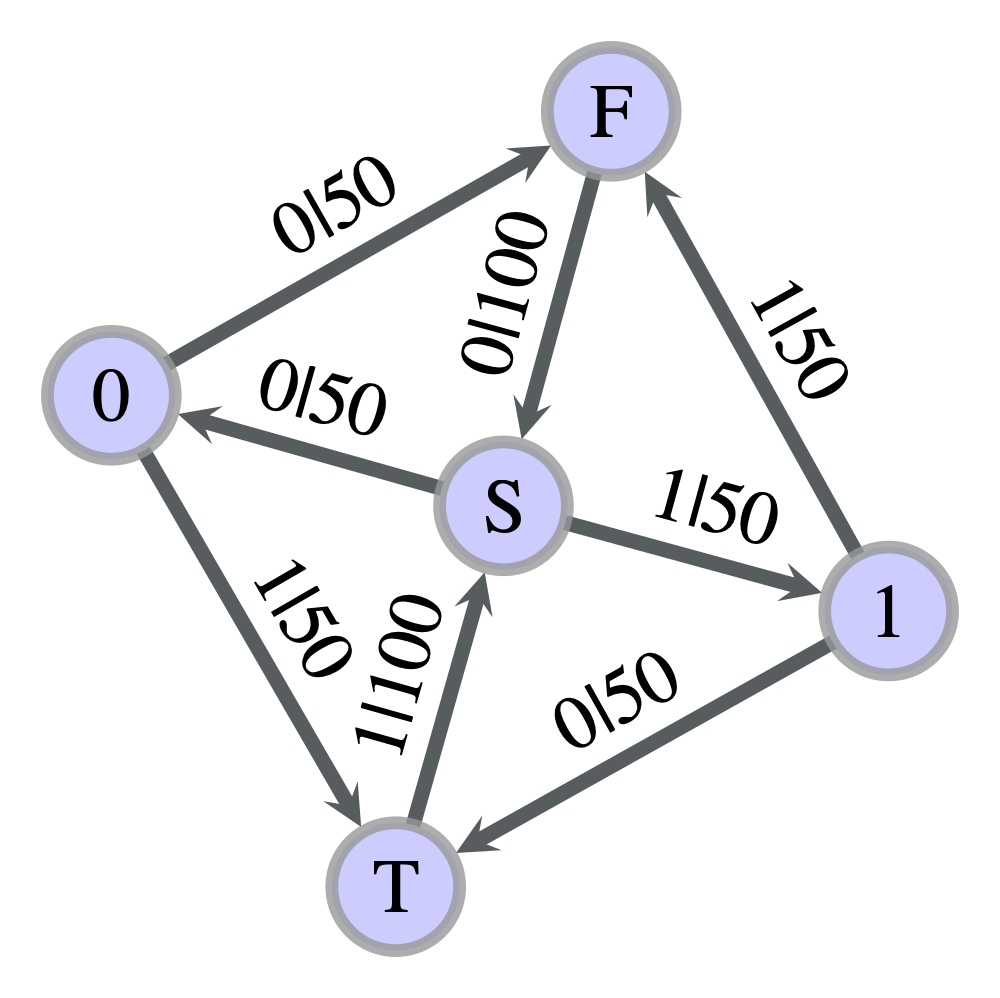

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2c1227dd0, at 0x2a7becbd0>

In [11]:
G = gt.Graph(directed=True)
# Assuming 'transition_matrix' is your matrix and 'state_names' is your dictionary
# Add vertices
vertices = {state: G.add_vertex() for state in process.state_names}

# Edge properties for symbols and weights
e_label = G.new_edge_property('string')
e_weight = G.new_edge_property('double')
e_pen_width = G.new_edge_property('double')
e_curved = G.new_edge_property('bool')

for symbol in range(process.transition_matrix.shape[0]):
    for from_state in range(process.transition_matrix.shape[1]):
        for to_state in range(process.transition_matrix.shape[2]):
            if process.transition_matrix[symbol, from_state, to_state] > 0:  # Adjust this condition if needed
                e = G.add_edge(vertices[process.state_inds[from_state]],
                               vertices[process.state_inds[to_state]])
                e_label[e] = f"{symbol}|{round(100*process.transition_matrix[symbol, from_state, to_state])}"
                e_weight[e] = process.transition_matrix[symbol, from_state, to_state]
                e_pen_width[e] = 7.5  # Adjust the pen width as desired
                e_curved[e] = False  # Set to True to make the edges curved

G.edge_properties['label'] = e_label
G.edge_properties['weight'] = e_weight
G.edge_properties['pen_width'] = e_pen_width
G.edge_properties['curved'] = e_curved

# Vertex labels
v_label = G.new_vertex_property('string')
for state, vertex in vertices.items():
    v_label[vertex] = state
G.vertex_properties['label'] = v_label

# Layout
pos = gt.sfdp_layout(G)

# Drawing the graph with vertex labels and custom edge labels
vertex_fill_color = G.new_vertex_property('vector<double>')
vertex_outline_color = G.new_vertex_property('vector<double>')
vertex_outline_width = G.new_vertex_property('double')

for v in G.vertices():
    vertex_fill_color[v] = (0.8, 0.8, 1.0, 1.0)  # Light blue color
    vertex_outline_color[v] = (0.0, 0.0, 0.0, 1.0)  # Black color
    vertex_outline_width[v] = 1.0

G.vertex_properties['fill_color'] = vertex_fill_color
G.vertex_properties['outline_color'] = vertex_outline_color
G.vertex_properties['outline_width'] = vertex_outline_width

gt.graph_draw(G, pos=pos, vertex_text=G.vertex_properties['label'], edge_text=G.edge_properties['label'], edge_pen_width=G.edge_properties['pen_width'], edge_curved=G.edge_properties['curved'], vertex_fill_color=G.vertex_properties['fill_color'], vertex_outline_color=G.vertex_properties['outline_color'], vertex_outline_width=G.vertex_properties['outline_width'], output_size=(500, 500))


In [10]:
process.state_inds

{0: 'S', 1: '0', 2: '1', 3: 'T', 4: 'F'}